  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

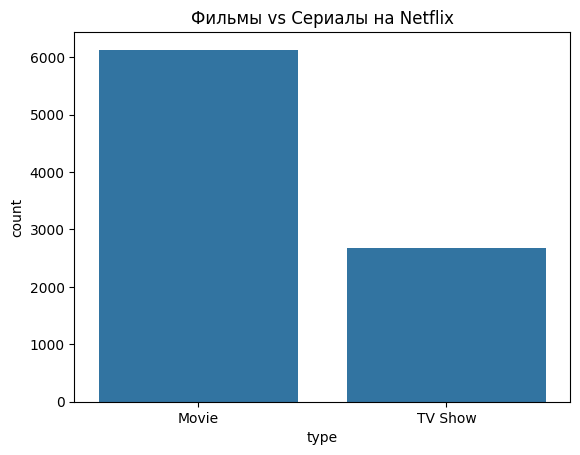

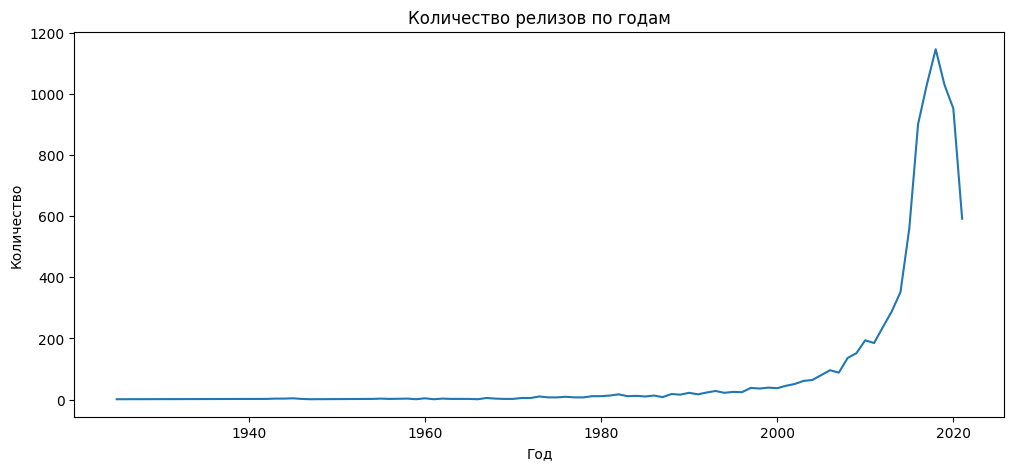

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# датасет
df = pd.read_csv('/content/netflix_titles.csv')


print(df.head())
print(df.info())
print(df.describe())

# Проверка пропусков
print(df.isnull().sum())

# Количество фильмов и сериалов по типу
sns.countplot(data=df, x='type')
plt.title('Фильмы vs Сериалы на Netflix')
plt.show()

# Количество релизов по годам
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Количество релизов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


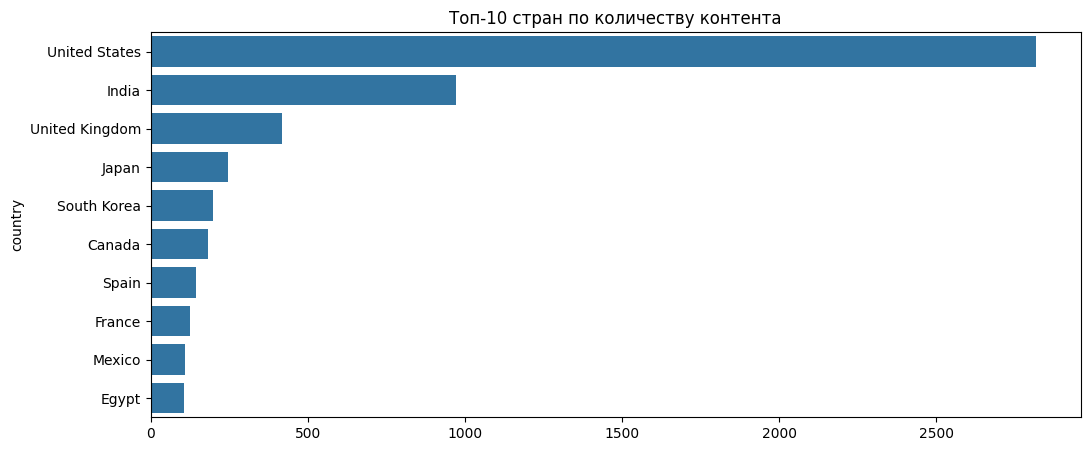

In [ ]:
# Топ 10 стран по количеству контента
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Топ-10 стран по количеству контента')
plt.show()


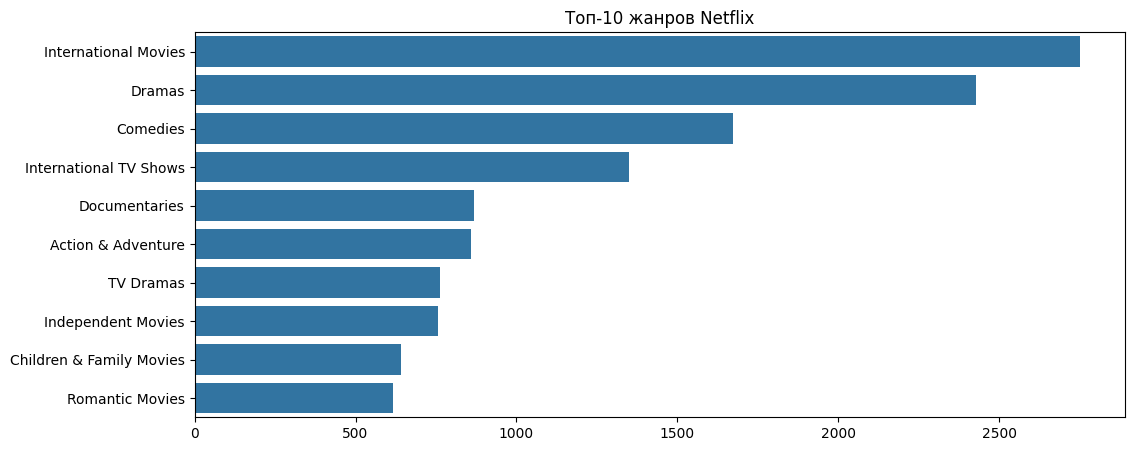

In [ ]:
from collections import Counter

genre_list = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_list for genre in sublist]

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

# Визуализируем
genres, counts = zip(*top_genres)
plt.figure(figsize=(12,5))
sns.barplot(x=list(counts), y=list(genres))
plt.title('Топ-10 жанров Netflix')
plt.show()


In [ ]:
# Разбираем жанры в отдельные колонки
from sklearn.preprocessing import MultiLabelBinarizer

df['listed_in'] = df['listed_in'].fillna('')
df['genres_list'] = df['listed_in'].apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(df['genres_list']),
                            columns=mlb.classes_,
                            index=df.index)

print(genre_matrix.head())


   Action & Adventure  Anime Features  Anime Series  British TV Shows  \
0                   0               0             0                 0   
1                   0               0             0                 0   
2                   0               0             0                 0   
3                   0               0             0                 0   
4                   0               0             0                 0   

   Children & Family Movies  Classic & Cult TV  Classic Movies  Comedies  \
0                         0                  0               0         0   
1                         0                  0               0         0   
2                         0                  0               0         0   
3                         0                  0               0         0   
4                         0                  0               0         0   

   Crime TV Shows  Cult Movies  ...  TV Action & Adventure  TV Comedies  \
0               0            

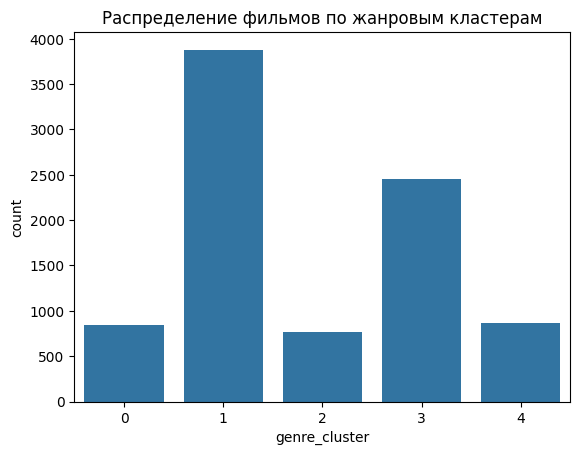

In [ ]:
from sklearn.cluster import KMeans

# Определение 5 кластеров
kmeans = KMeans(n_clusters=5, random_state=42)
df['genre_cluster'] = kmeans.fit_predict(genre_matrix)

# распределение по кластерам
sns.countplot(data=df, x='genre_cluster')
plt.title('Распределение фильмов по жанровым кластерам')
plt.show()


In [ ]:
fig = px.histogram(df, x='release_year', color='country',
                   title='Релизы Netflix по годам и странам',
                   labels={'release_year':'Год', 'country':'Страна'},
                   height=600)
fig.update_layout(barmode='stack')
fig.show()


In [ ]:
top_genres_df = pd.DataFrame(top_genres, columns=['Genre','Count'])
fig2 = px.bar(top_genres_df, x='Count', y='Genre', orientation='h',
              title='Топ-10 жанров Netflix', text='Count')
fig2.show()


In [ ]:
# количество фильмов/сериалов по странам
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# топ-15 стран
top_countries = country_counts.head(15)

# Интерактивный барплот
fig = px.bar(top_countries, x='count', y='country', orientation='h',
             title='Топ-15 стран по количеству контента на Netflix',
             text='count')
fig.show()


In [ ]:
# Фильтрация только топ 5 стран для наглядности
top5_countries = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top5_countries)]

# Группируем по годам и странам
year_country = df_top5.groupby(['release_year', 'country']).size().reset_index(name='count')

# Линия тренда по странам
fig2 = px.line(year_country, x='release_year', y='count', color='country',
               title='Динамика релизов по топ-5 странам')
fig2.show()
